<a href="https://colab.research.google.com/github/anderson-perez/Aulas-de-IEC/blob/main/KMeans_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado não-supervisionado

- Algoritmo KMEANS
- Algoritmo DBSCAN

In [1]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

# KMeans
- Clusteriza os dados com base nas médias de distância.

In [2]:
from sklearn.cluster import KMeans

In [3]:
X_blobs, y_blobs = make_blobs(n_samples=100, centers=3)

In [4]:
y_blobs

array([2, 1, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 2, 2, 2, 1,
       1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 2, 1])

In [5]:
import plotly.express as ex

In [6]:
fig = ex.scatter(x=X_blobs[:,0], y=X_blobs[:,1])
fig.show()

In [7]:
kmeans_blobs =KMeans(n_clusters=3)

In [8]:
kmeans_blobs.fit(X_blobs)

KMeans(n_clusters=3)

In [9]:
labels_k_blobs = kmeans_blobs.labels_

In [10]:
centroides = kmeans_blobs.cluster_centers_

In [11]:
centroides

array([[-0.35552011, -6.35520034],
       [-8.60249225,  6.02723864],
       [ 3.83034443, -9.42555149]])

In [12]:
import plotly.graph_objects as go

In [13]:
fig1 = ex.scatter(x=X_blobs[:,0], y=X_blobs[:,1], color=labels_k_blobs)
fig2 = ex.scatter(x=centroides[:,0], y=centroides[:,1], size=[7,7,7])
fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show()

# Algoritmo DBSCAN - Density Based Spatial Clustering Application with Noisy

In [14]:
from sklearn.cluster import DBSCAN

In [15]:
dbscan_blobs = DBSCAN(eps=2)

In [16]:
dbscan_blobs.fit(X_blobs)

DBSCAN(eps=2)

In [17]:
labels_db_blobs = dbscan_blobs.labels_

In [18]:
labels_db_blobs

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [19]:
import numpy as np

In [20]:
np.unique_counts(labels_db_blobs)

UniqueCountsResult(values=array([0, 1]), counts=array([66, 34]))

In [21]:
fig11 = ex.scatter(x=X_blobs[:,0], y=X_blobs[:,1], color=labels_db_blobs)
#fig21 = ex.scatter(x=centroides[:,0], y=centroides[:,1], size=[7,7,7])
#fig31 = go.Figure(data=fig1.data + fig2.data)
fig11.show()

In [22]:
import pandas as pd

In [23]:
casas = pd.read_csv('/content/housing.csv')

In [24]:
casas.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [25]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [26]:
X = casas.iloc[:, 0:2].values

In [27]:
X

array([[-122.23,   37.88],
       [-122.22,   37.86],
       [-122.24,   37.85],
       ...,
       [-121.22,   39.43],
       [-121.32,   39.43],
       [-121.24,   39.37]])

In [28]:
fig_casas = ex.scatter(x = X[:,0], y = X[:,1])
fig_casas.show()

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
standard = StandardScaler()

In [31]:
X_padronizado = standard.fit_transform(X)

In [32]:
X_padronizado

array([[-1.32783522,  1.05254828],
       [-1.32284391,  1.04318455],
       [-1.33282653,  1.03850269],
       ...,
       [-0.8237132 ,  1.77823747],
       [-0.87362627,  1.77823747],
       [-0.83369581,  1.75014627]])

In [33]:
kmeans_casas = KMeans(n_clusters=3, random_state=0)

In [34]:
kmeans_casas.fit(X_padronizado)

KMeans(n_clusters=3, random_state=0)

In [35]:
labels_kmeans_casas = kmeans_casas.labels_

In [36]:
centroides_casas = kmeans_casas.cluster_centers_

In [42]:
labels_kmeans_casas, centroides_casas

(array([2, 2, 2, ..., 2, 2, 2], dtype=int32),
 array([[ 0.84092258, -0.84608743],
        [-0.070718  ,  0.17339485],
        [-1.17889101,  1.16180951]]))

In [37]:
fig_casas = ex.scatter(x = X_padronizado[:,0], y =X_padronizado[:,1], color=labels_kmeans_casas)
fig_casas2 = ex.scatter(x = centroides_casas[:,0], y = centroides_casas[:,1], size=[6, 6, 6])
fig_casas3 = go.Figure(data = fig_casas.data + fig_casas2.data)
fig_casas3.show()

In [43]:
casas.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [44]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [45]:
casas['total_bedrooms'].fillna(casas['total_bedrooms'].mean(), inplace=True)

<ipython-input-45-3435088162>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [46]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [47]:
casas.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [48]:
Xx10 = casas.iloc[:, 0:9].values

In [49]:
Xx10

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [50]:
Xx_mesma_escala = standard.fit_transform(Xx10)

In [51]:
Xx_mesma_escala

array([[-1.32783522,  1.05254828,  0.98214266, ..., -0.97703285,
         2.34476576,  2.12963148],
       [-1.32284391,  1.04318455, -0.60701891, ...,  1.66996103,
         2.33223796,  1.31415614],
       [-1.33282653,  1.03850269,  1.85618152, ..., -0.84363692,
         1.7826994 ,  1.25869341],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.17404163,
        -1.14259331, -0.99274649],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.39375258,
        -1.05458292, -1.05860847],
       [-0.83369581,  1.75014627, -1.00430931, ...,  0.07967221,
        -0.78012947, -1.01787803]])

In [54]:
k_means_casas_mesma_escala = KMeans(n_clusters=3, random_state=0)

In [55]:
k_means_casas_mesma_escala.fit(Xx_mesma_escala)

KMeans(n_clusters=3, random_state=0)

In [56]:
k_means_casas_mesma_escala.labels_, k_means_casas_mesma_escala.cluster_centers_

(array([2, 1, 2, ..., 2, 2, 2], dtype=int32),
 array([[ 0.78145789, -0.80442688,  0.0855298 , -0.212947  , -0.19517126,
         -0.13727286, -0.19050377,  0.02134363,  0.0669679 ],
        [ 0.19493138, -0.17391426, -0.94683903,  2.37078527,  2.43161542,
          2.25164662,  2.43413286,  0.19042123,  0.14774938],
        [-1.05344035,  1.07894534,  0.08227896, -0.20758818, -0.24305952,
         -0.28143531, -0.24962765, -0.06654527, -0.11701822]]))

## Como descobrir o melhor valor para K

In [62]:
# Método do cotovelo (Elbow Method)
inercia = []
n_clusters = []

for i in range(2, 9):
  k_means_casas_mesma_escala = KMeans(n_clusters=i, random_state=0)
  k_means_casas_mesma_escala.fit(Xx_mesma_escala)
  n_clusters.append(i)
  inercia.append(k_means_casas_mesma_escala.inertia_)


In [58]:
import matplotlib.pyplot as plt

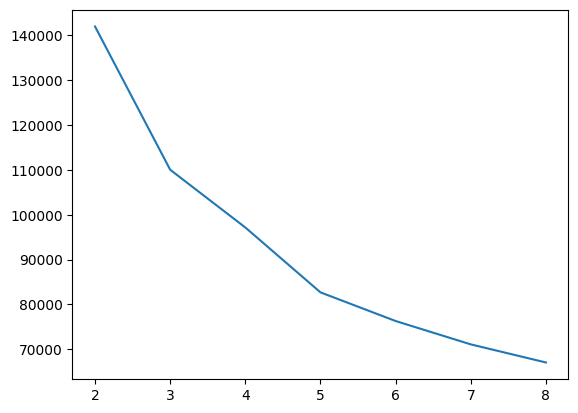

In [63]:
plt.plot(n_clusters, inercia)
plt.show()

# DBSCAN

In [38]:
dbscan_casas = DBSCAN(eps=0.1)

In [39]:
dbscan_casas.fit(X_padronizado)

DBSCAN(eps=0.1)

In [40]:
fig_casas_db = ex.scatter(x = X_padronizado[:,0], y =X_padronizado[:,1], color=dbscan_casas.labels_)
#fig_casas2_db = ex.scatter(x = centroides_casas[:,0], y = centroides_casas[:,1], size=[6, 6, 6])
#fig_casas3_db = go.Figure(data = fig_casas_db.data + fig_casas2.data)
fig_casas_db.show()

In [41]:
# Na próxima aula iremos dar continuidade aos estudos dos algoritmos KMEANS e DBSCAN.

# PCA - Principal Component Analysis

In [65]:
from sklearn.decomposition import PCA

In [70]:
casas_pca = PCA(n_components=4)

In [67]:
Xx_mesma_escala.shape

(20640, 9)

In [71]:
X_casas_pca = casas_pca.fit_transform(Xx_mesma_escala)

In [72]:
X_casas_pca.shape

(20640, 4)

In [81]:
dados_moon, classes = make_moons(1000, )

In [87]:
k_moons = KMeans(n_clusters=2, random_state=0)
db_moons = DBSCAN(eps=0.5)

In [88]:
k_moons.fit(dados_moon)
db_moons.fit(dados_moon)

DBSCAN()

In [84]:
fig_1 = ex.scatter(x = dados_moon[:,0], y =dados_moon[:,1], color=classes)
fig_1.show()

In [85]:
# KMeans
figk_1 = ex.scatter(x = dados_moon[:,0], y =dados_moon[:,1], color=k_moons.labels_)
figk_1.show()

In [89]:
# DBSCAN
figdb_1 = ex.scatter(x = dados_moon[:,0], y =dados_moon[:,1], color=db_moons.labels_)
figdb_1.show()